# Information
$Writer: Junhyuck\ Woo$ <br>
$Std.ID: 20145337$<br>
$Assignment06:\ Logistic\ regression\ for\ a\ binary\ classification\ with\ a\ non-linear\ classification\ boundary$<br>
$Deadline: Apr\ 30, 2020$
<hr>

# Library

In [0]:
import matplotlib.pyplot as plt; import numpy as np; import collections

#Data


In [0]:
path="/content/drive/My Drive/Spring|2020/Machine_Learning/CAU-MachineLearning/Assignment06/data-nonlinear.txt"
data    = np.genfromtxt(path, delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

m = label.size

#Logistic regression

$\hat{h} = \sigma(z)$<br>
$z = g(x, y; \theta)$, where $g$ is a high dimensional function and  $\theta \in \mathbb{R}^{k}$<br>
$\theta = (\theta_{0}, \theta_{1}, \cdots, \theta_{k-1})$<br>
$g(x, y ; \theta) = \theta_{0} f_{0}(x, y) + \theta_{1} f_{1}(x, y) + \cdots + \theta_{k-1} f_{k-1}(x, y)$<br>
$f_{k}(x, y)$ be any high dimensional function of $x$ and $y$<br>
$\sigma(z) = \frac{1}{1 + \exp(-z)}$<br>
$\sigma^{\prime}(z) = \sigma(z) (1 - \sigma(z))$<br><br>

$z = \theta_0 + \theta_1x + \theta_2y + \theta_3x^2+\theta_4y^2$<br><br>

$Initial\ Value$<br>
${\theta}_0 = -18$<br>
${\theta}_1 = -0.5$<br>
${\theta}_2 = 0.5$<br>
${\theta}_3 = 0.5$<br>
${\theta}_4 = 0.5$

In [0]:
theta0 = -10; theta0_old = 0
theta1 = -0.5; theta1_old = 0
theta2 = 0.5; theta2_old = 0
theta3 = 0.5; theta3_old = 0
theta4 = 0.5; theta4_old = 0

theta0_history = [theta0]
theta1_history = [theta1]
theta2_history = [theta2]
theta3_history = [theta3]
theta4_history = [theta4]

z = theta0 + theta1*pointX + theta2*pointY + theta3*pointX*pointX + theta4*pointY*pointY
sigma = 1/(1 + np.exp(-z))
sigma_ = sigma * (1-sigma)

# Check the accuracy
tmp = (np.round(sigma) == label)
accuracy = collections.Counter(tmp)[1] * 100 / m
accuracy_history = [accuracy]

# Objective Function
$J(\theta) = \frac{1}{m} \sum_{i=1}^m ( - l^{(i)} \log(\sigma(g(x^{(i)}, y^{(i)}; \theta))) - (1 - l^{(i)}) \log(1 - \sigma(g(x^{(i)}, y^{(i)}; \theta)))  )$

In [0]:
j = np.sum(-label*np.log(sigma) - (1-label)*np.log(1-sigma)) / m
j_old = 0
j_history = [j]

# Training Process - Gradient Descent
${\alpha} = 0.002$<br>
$\theta_{k}^{(t+1)} = \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(g(x^{(i)}, y^{(i)}; \theta)) - l^{(i)}) \frac{\partial g(x^{(i)}, y^{(i)}; \theta^{(t)})}{\partial \theta_{k}},\ for\ all\ k$

In [0]:
alpha = 0.002

# Check the number of iteration
iteration = 1

# Set the two condition because it spent too much time for converge
while  (iteration < 500000):#(iteration < 8388608):
    # Calculate the theta
    theta0_old = theta0
    theta1_old = theta1
    theta2_old = theta2
    theta3_old = theta3
    theta4_old = theta4

    theta0 = theta0 - alpha*np.sum(sigma-label)/m
    theta1 = theta1 - alpha*np.sum((sigma-label)*pointX)/m
    theta2 = theta2 - alpha*np.sum((sigma-label)*pointY)/m
    theta3 = theta3 - alpha*np.sum((sigma-label)*pointX*pointX)/m
    theta4 = theta4 - alpha*np.sum((sigma-label)*pointY*pointY)/m

    # Update the j
    j_old = j
    z = theta0 + theta1*pointX + theta2*pointY + theta3*pointX*pointX + theta4*pointY*pointY 
    sigma = 1/(1 + np.exp(-z))
    j = np.sum(-label*np.log(sigma) - (1-label)*np.log(1-sigma)) / m

    # Check the accuracy
    tmp = (np.round(sigma) == label)
    accuracy = collections.Counter(tmp)[1] * 100 / m

    # Record the history of parameter
    theta0_history.append(theta0)
    theta1_history.append(theta1)
    theta2_history.append(theta2)
    theta3_history.append(theta3)
    theta4_history.append(theta4)
    j_history.append(j)
    accuracy_history.append(accuracy)

    iteration = iteration +1



#Check the Convergence

In [6]:
# Iteration
print("# Iteration: " + str(iteration) + '\n')

# Theta 0
print("Updated Theta0: "+ str(theta0))
print("Old Theta0: " + str(theta0_old))
print("Diff: " + str(theta0 - theta0_old) + '\n')

# Theta 1
print("Updated Theta1: "+ str(theta1))
print("Old Theta1: " + str(theta1_old))
print("Diff: " + str(theta1 - theta1_old) + '\n')

# Theta 2
print("Updated Theta1: "+ str(theta2))
print("Old Theta1: " + str(theta2_old))
print("Diff: " + str(theta2 - theta2_old) + '\n')

# J, Energy Value
print("Updated J: "+ str(j))
print("Old J: " + str(j_old))
print("Diff: " + str(j - j_old) + '\n')

# Iteration: 500000

Updated Theta0: 3.4274431143989657
Old Theta0: 3.427441643042927
Diff: 1.471356038784677e-06

Updated Theta1: 1.1977197336142749
Old Theta1: 1.1977191151717372
Diff: 6.18442537625441e-07

Updated Theta1: 2.0458865617631017
Old Theta1: 2.0458855891787318
Diff: 9.72584369929308e-07

Updated J: 0.4364299319208895
Old J: 0.4364299435479514
Diff: -1.1627061868857425e-08



# Grid


In [0]:
x_range = np.arange(-1, 1.25, 0.01)
y_range = np.arange(-1, 1.25, 0.01)
x_grid, y_grid = np.meshgrid(x_range, y_range)
z_ = theta0 + theta1*x_grid + theta2*y_grid + theta3*x_grid*x_grid + theta4*y_grid*y_grid
sig = 1/(1 + np.exp(-z_))
#contour = np.round(sig,1)
contour = (contour==0.5)
contour = 0.5*np.multiply(contour, 1)

___
#Result

#1. Training Data

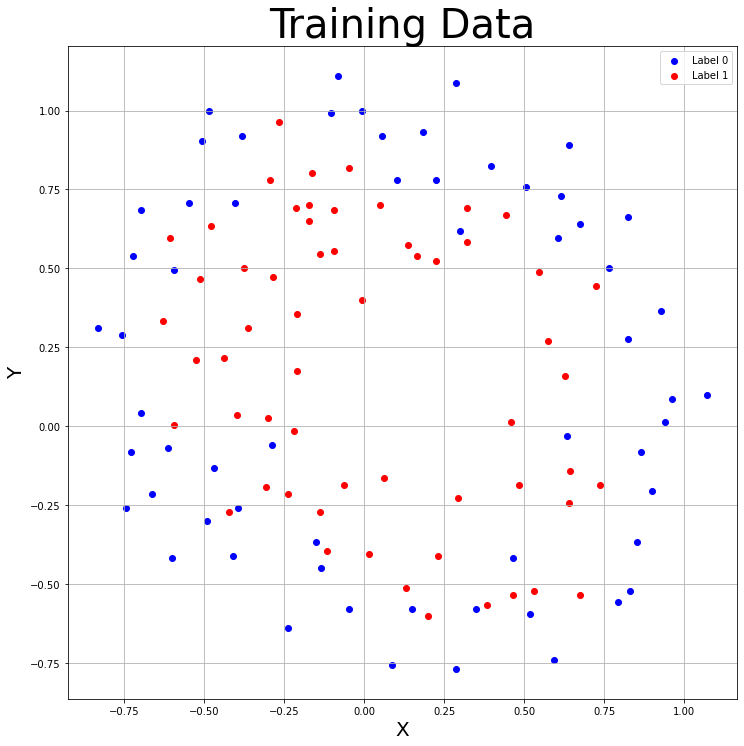

In [8]:
plt.figure(figsize=(12,12))
plt.scatter(pointX0, pointY0, c='b', label='Label 0')
plt.scatter(pointX1, pointY1, c='r', label='Label 1')
plt.grid()
plt.legend()
plt.title('Training Data', fontsize=40)
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.show()

#2. High dimensional function $g(x, y; \theta)$
$g(x, y; \theta) = $

#3. Training Error

Text(0, 0.5, 'Error')

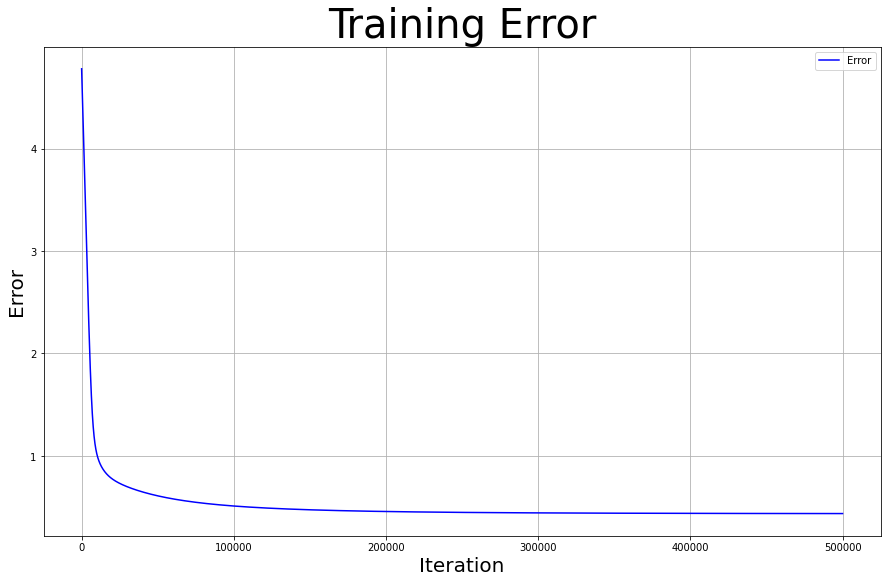

In [10]:
plt.figure(figsize=(15,9))
plt.plot(j_history, color='blue', label='Error')
plt.grid()
plt.legend()
plt.title('Training Error', fontsize=40)
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Error', fontsize=20)

#4. Training Accuracy

Text(0, 0.5, 'Accuracy')

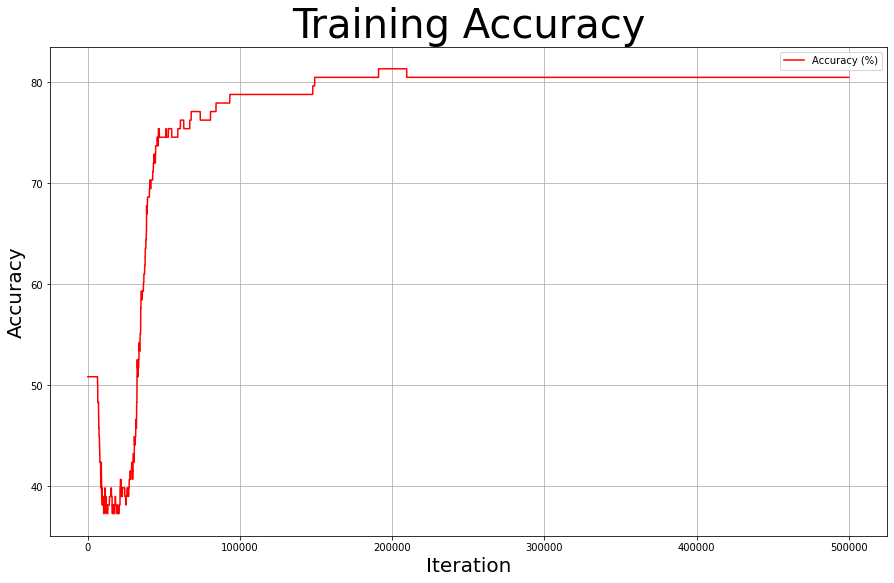

In [11]:
plt.figure(figsize=(15,9))
plt.plot(accuracy_history, color='red', label='Accuracy (%)')
plt.grid()
plt.legend()
plt.title('Training Accuracy', fontsize=40)
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)

#5. Final Training Accuracy

In [12]:
print(accuracy)

80.50847457627118


#6. Optimal Classifier Superimposed on Training Data

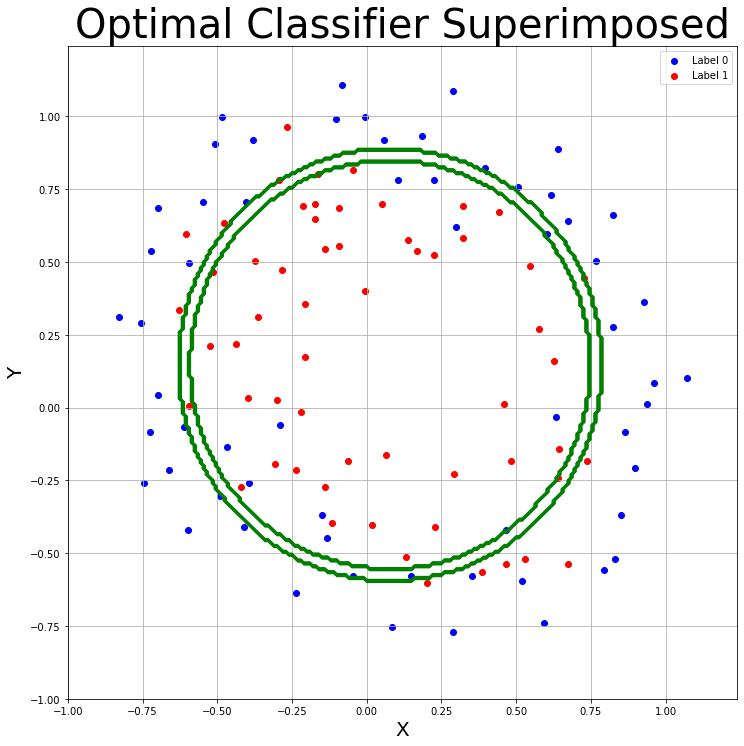

In [49]:
plt.figure(figsize=(12,12))
plt.contour(x_grid, y_grid, contour, colors='g')
plt.scatter(pointX0, pointY0, c='b', label='Label 0')
plt.scatter(pointX1, pointY1, c='r', label='Label 1')
plt.grid()
plt.legend()
plt.title('Optimal Classifier Superimposed', fontsize=40)
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.show()